
# Installing all packages require to run the notebook


In [ ]:
# !pip install qiskit==1.4.3 qiskit-ibm-runtime qiskit[visualization] --quiet
# !pip install qiskit-machine-learning --quiet

In [ ]:
# !pip install pylatexenc --quiet

In [ ]:
# !pip install matminer pymatgen scikit-learn matplotlib --quiet

# Importing the necessary libraries

In [ ]:
from matminer.datasets import load_dataset
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loading the dataset

Matminer's dataset : matbench_expt_is_metal (Description: Dataset for classifying metallicity from composition alone)

https://hackingmaterials.lbl.gov/matminer/

In [ ]:
# Load the dataset
df = load_dataset("matbench_expt_is_metal")
df = df.dropna()

In [ ]:
df

,composition,is_metal
0,Ag(AuS)2,True
1,Ag(W3Br7)2,True
2,Ag0.5Ge1Pb1.75S4,False
3,Ag0.5Ge1Pb1.75Se4,False
4,Ag2BBr,True
...,...,...
4916,ZrTaN3,False
4917,ZrTe,True
4918,ZrTi2O,True
4919,ZrTiF6,True


In [ ]:
# Convert formulas to pymatgen Composition
df["composition_elm"] = df["composition"].apply(lambda x: Composition(x))

In [ ]:
df.head()

,composition,is_metal,composition_elm
0,Ag(AuS)2,True,"(Ag, Au, S)"
1,Ag(W3Br7)2,True,"(Ag, W, Br)"
2,Ag0.5Ge1Pb1.75S4,False,"(Ag, Ge, Pb, S)"
3,Ag0.5Ge1Pb1.75Se4,False,"(Ag, Ge, Pb, Se)"
4,Ag2BBr,True,"(Ag, B, Br)"


# Using MAGPIE to featurize the compositions:

MAGPIE stands for Materials-Agnostic Platform for Informatics and Exploration.
It is a framework developed to enable data-driven materials discovery by converting chemical compositions into numerical feature vectors that can be used in machine learning models.

Developed originally by Ward et al. (2016) at the University of Wisconsin–Madison.

MAGPIE provides a composition-based featurization strategy—meaning it extracts features purely based on the elemental composition of a material (without requiring structural information like atomic coordinates).

In [ ]:
# Use Magpie featurizer
featurizer = ElementProperty.from_preset("magpie")
df = featurizer.featurize_dataframe(df, "composition_elm", ignore_errors=True)

# Clean data
df = df.replace([float("inf"), float("-inf")], float("nan")).dropna()

# Features and label
X = df[featurizer.feature_labels()]
y = df["is_metal"]

/usr/local/lib/python3.11/dist-packages/matminer/utils/data.py:326: UserWarning: MagpieData(impute_nan=False):
In a future release, impute_nan will be set to True by default.
                    This means that features that are missing or are NaNs for elements
                    from the data source will be replaced by the average of that value
                    over the available elements.
                    This avoids NaNs after featurization that are often replaced by
                    dataset-dependent averages.
  warnings.warn(f"{self.__class__.__name__}(impute_nan=False):\n" + IMPUTE_NAN_WARNING)


ElementProperty:   0%|          | 0/4921 [00:00<?, ?it/s]

In [ ]:
X

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,16.0,79.0,63.0,47.400000,25.280000,16.0,65.0,88.0,23.0,74.600000,...,0.000000,0.000000,0.000000,0.000000,70.0,225.0,155.0,163.000000,74.400000,70.0
1,35.0,74.0,39.0,46.714286,15.619048,35.0,51.0,95.0,44.0,81.000000,...,0.000000,0.000000,0.000000,0.000000,64.0,229.0,165.0,118.809524,73.079365,64.0
2,16.0,82.0,66.0,36.275862,23.552913,16.0,65.0,88.0,23.0,83.482759,...,0.000000,0.000000,0.000000,0.000000,70.0,225.0,155.0,139.482759,76.670630,70.0
3,32.0,82.0,50.0,46.206897,17.388823,34.0,65.0,89.0,24.0,84.034483,...,0.000000,0.000000,0.000000,0.000000,14.0,225.0,211.0,108.586207,104.370987,14.0
4,5.0,47.0,42.0,33.500000,14.250000,47.0,65.0,95.0,30.0,74.250000,...,0.000000,0.000000,0.000000,0.000000,64.0,225.0,161.0,170.000000,55.000000,225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,7.0,73.0,66.0,26.800000,23.760000,7.0,44.0,82.0,38.0,67.600000,...,0.000000,0.000000,0.000000,0.000000,194.0,229.0,35.0,201.000000,11.200000,194.0
4917,40.0,52.0,12.0,46.000000,6.000000,40.0,44.0,90.0,46.0,67.000000,...,0.000000,0.000000,0.000000,0.000000,152.0,194.0,42.0,173.000000,21.000000,152.0
4918,8.0,40.0,32.0,23.000000,8.500000,22.0,43.0,87.0,44.0,54.250000,...,0.000023,0.000011,0.000011,0.000023,12.0,194.0,182.0,148.500000,68.250000,194.0
4919,9.0,40.0,31.0,14.500000,8.250000,9.0,43.0,93.0,50.0,80.625000,...,0.000023,0.000003,0.000005,0.000000,15.0,194.0,179.0,59.750000,67.125000,15.0


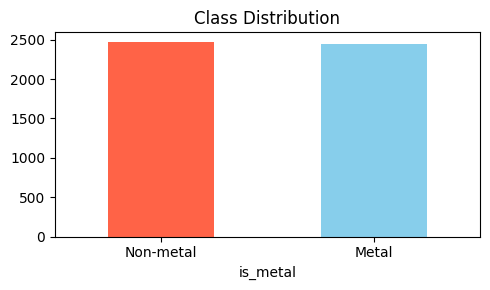

,composition,is_metal
0,Ag(AuS)2,True
1,Ag(W3Br7)2,True
2,Ag0.5Ge1Pb1.75S4,False
3,Ag0.5Ge1Pb1.75Se4,False
4,Ag2BBr,True


In [ ]:
# Plot label distribution
plt.figure(figsize=(5, 3))
df["is_metal"].value_counts().plot(kind="bar", color=["tomato", "skyblue"])
plt.xticks(ticks=[0, 1], labels=["Non-metal", "Metal"], rotation=0)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

# Preview
df[["composition", "is_metal"]].head()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train a Random Forest on all features (scaled or unscaled)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Create a sorted list of feature importance
feature_ranking = sorted(zip(importances, X.columns), reverse=True)

# Print top 10 features
print("Top features by importance:")
for score, name in feature_ranking[:10]:
    print(f"{name}: {score:.4f}")

Top features by importance:
MagpieData mean NpValence: 0.0692
MagpieData maximum MendeleevNumber: 0.0474
MagpieData mean Column: 0.0368
MagpieData maximum GSbandgap: 0.0316
MagpieData maximum Column: 0.0300
MagpieData maximum NpValence: 0.0295
MagpieData mean MendeleevNumber: 0.0269
MagpieData mean MeltingT: 0.0247
MagpieData maximum MeltingT: 0.0191
MagpieData mode MeltingT: 0.0191


In [ ]:
selected_features = [name for _, name in feature_ranking[:5]]
X_qml = X[selected_features]

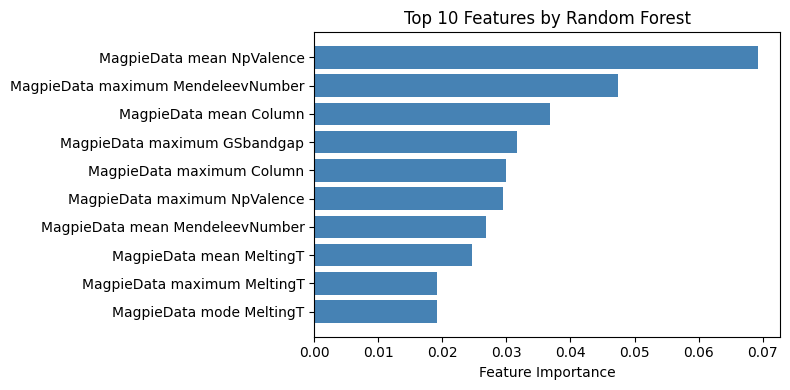

In [ ]:
import matplotlib.pyplot as plt

top_features = feature_ranking[:10]
labels, scores = zip(*[(name, score) for score, name in top_features])

plt.figure(figsize=(8, 4))
plt.barh(labels[::-1], scores[::-1], color="steelblue")
plt.xlabel("Feature Importance")
plt.title("Top 10 Features by Random Forest")
plt.tight_layout()
plt.show()

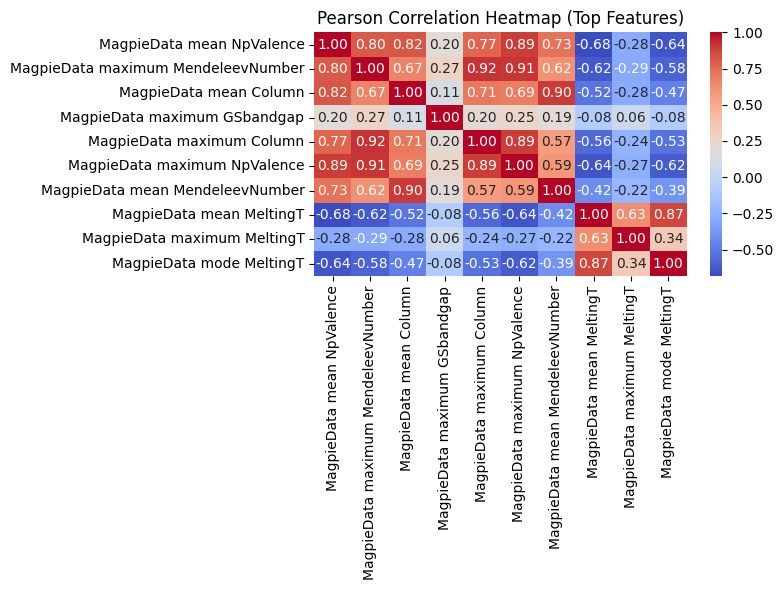

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for top features
top_feature_names = [name for _, name in feature_ranking[:10]]
corr_matrix = df[top_feature_names].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap (Top Features)")
plt.tight_layout()
plt.show()

In [ ]:
selected_features = [
    "MagpieData maximum GSbandgap",
    "MagpieData mean NpValence",
    "MagpieData maximum Column",
    "MagpieData mean MeltingT"
]

# Extract features
X_selected = df[selected_features]

# Convert target to -1 and 1
y = df["is_metal"].apply(lambda x: 1 if x == 1 else -1)

# Combine into final DataFrame
df_qml_ready = pd.DataFrame(X_selected, columns=selected_features)
df_qml_ready["target"] = y

# Preview
df_qml_ready.head()

,MagpieData maximum GSbandgap,MagpieData mean NpValence,MagpieData maximum Column,MagpieData mean MeltingT,target
0,2.202,1.600000,16.0,937.262000,1
1,1.457,3.333333,17.0,1291.720476,1
2,2.202,2.965517,16.0,611.499655,-1
3,0.799,2.965517,16.0,669.783793,-1
4,1.524,1.500000,17.0,1270.915000,1


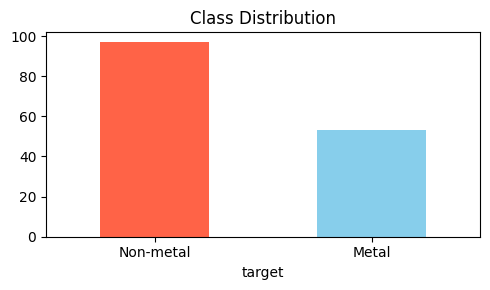

In [ ]:
# Plot label distribution
plt.figure(figsize=(5, 3))
df_qml_ready[:150]["target"].value_counts().plot(kind="bar", color=["tomato", "skyblue"])
plt.xticks(ticks=[0, 1], labels=["Non-metal", "Metal"], rotation=0)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

## Randomly choosing 150 datapoints to maintain similar distribution of the data for better learning and prediction

In [ ]:
import numpy as np

rng = np.random.default_rng(seed=42)
idx = rng.choice(len(df_qml_ready), size=150,  replace=False)
df_qml_150 = df_qml_ready.iloc[idx].reset_index(drop=True)

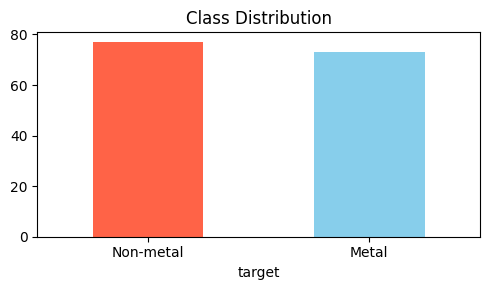

In [ ]:
plt.figure(figsize=(5, 3))
df_qml_150["target"].value_counts().plot(kind="bar", color=["tomato", "skyblue"])
plt.xticks(ticks=[0, 1], labels=["Non-metal", "Metal"], rotation=0)
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

In [ ]:
features = df_qml_150.copy()

In [ ]:
features.drop(columns=["target"], inplace=True)

In [ ]:
labels = df_qml_150["target"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

# Building the Quantum ciruit for classification task

### Mapping the data to the circuit using ZZFeatureMap (Step 1)

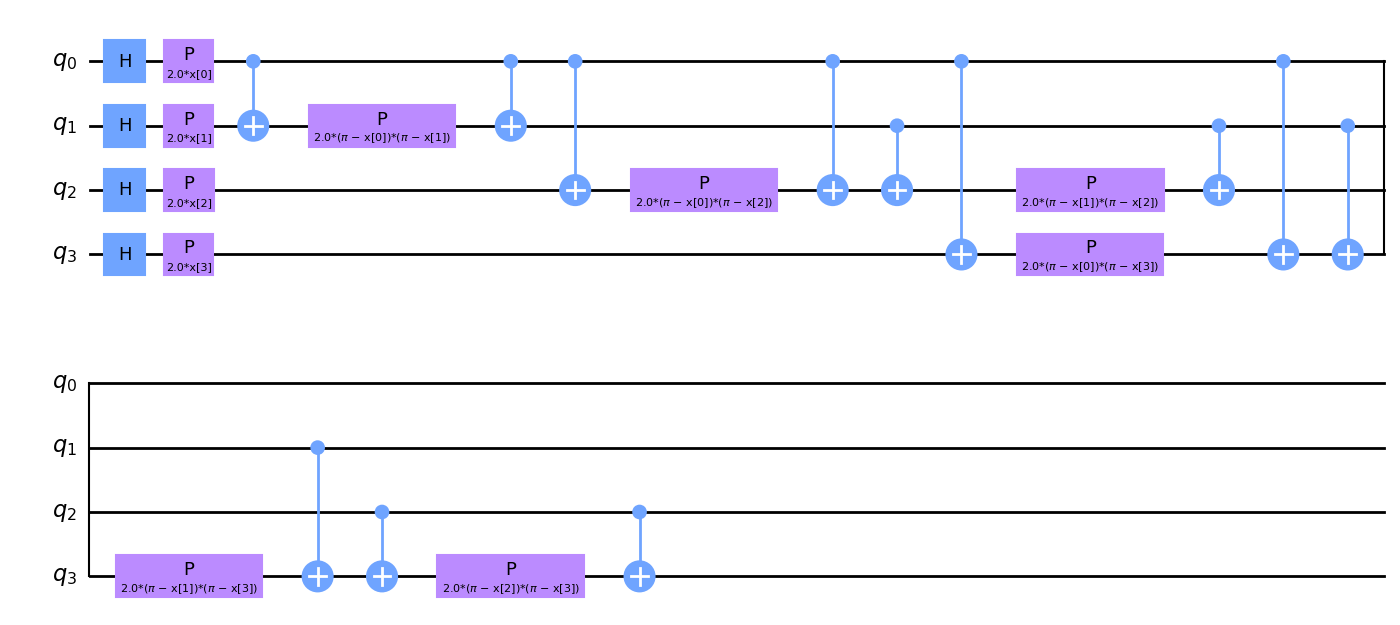

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

### Applying variational circuit/ Ansatz (Step 2)

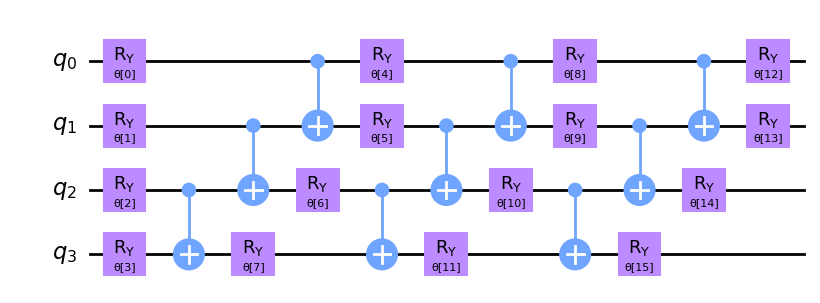

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)

### Calling Sampler for taking measurement (Step 3)

In [ ]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler()

### Calling a classical optimizer, COBYLA (Step 4)

In [ ]:
from qiskit_machine_learning.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

### Setting up visualization to check through the training process

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

### If you want to run the training on a real backend transpilation is important using Qiskit Pass manager ###

In [1]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False)
# print(backend.name)

In [2]:
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# target = backend.target

# pm = generate_preset_pass_manager(target=target, optimization_level=3)

### Put everything together to start the training

We would use the VQC algorithm from [Qiskit Machine Learning](https://qiskit-community.github.io/qiskit-machine-learning/stubs/qiskit_machine_learning.algorithms.VQC.html#qiskit_machine_learning.algorithms.VQC) package

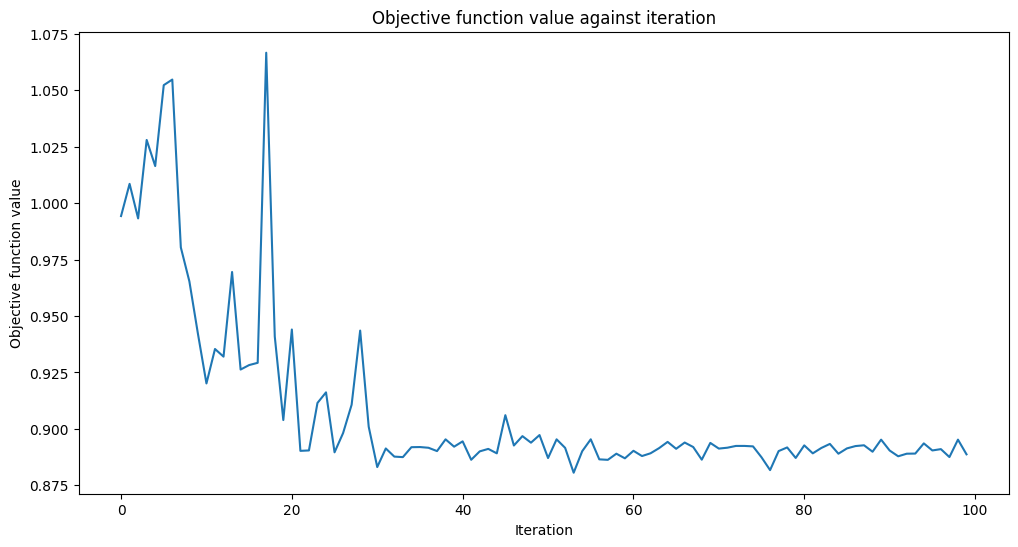

Training time: 163 seconds


In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    pass_manager=None, # use pm if using a real backend
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels.values.ravel())
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.70
Quantum VQC on the test dataset:     0.67


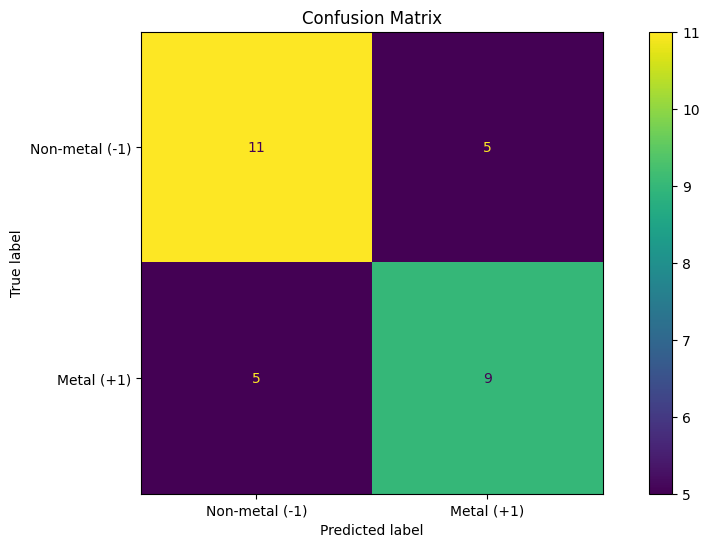

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
pred_labels = vqc.predict(test_features)

# Create confusion matrix
cm = confusion_matrix(test_labels, pred_labels, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-metal (-1)", "Metal (+1)"])

# Plot it
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels, target_names=['non-metal','metal']))

              precision    recall  f1-score   support

   non-metal       0.69      0.69      0.69        16
       metal       0.64      0.64      0.64        14

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30



### Try using circuits which might be more efficient to run on hardwares

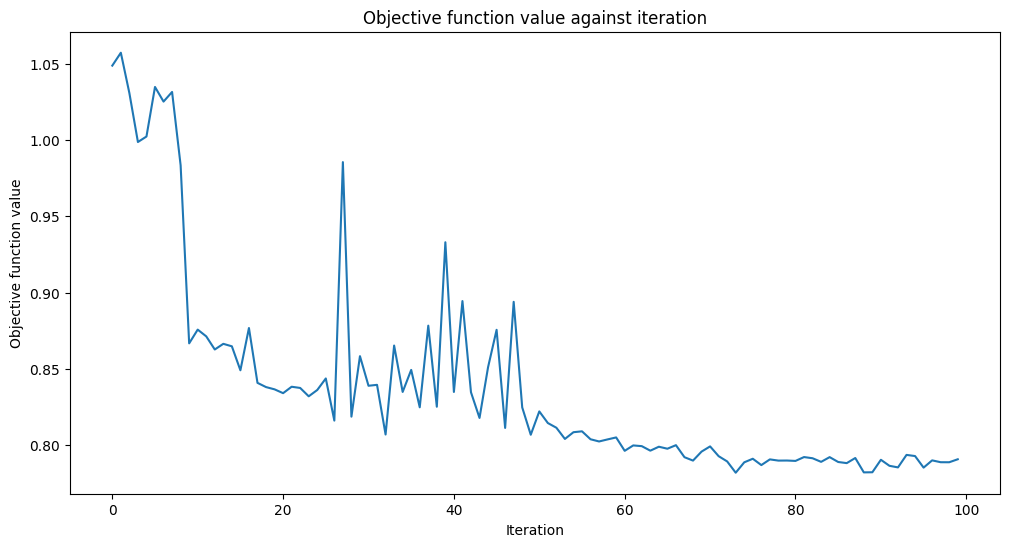

Training time: 170 seconds


In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=2)
optimizer = COBYLA(maxiter=100)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels.values.ravel())
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.71
Quantum VQC on the test dataset using EfficientSU2:     0.87


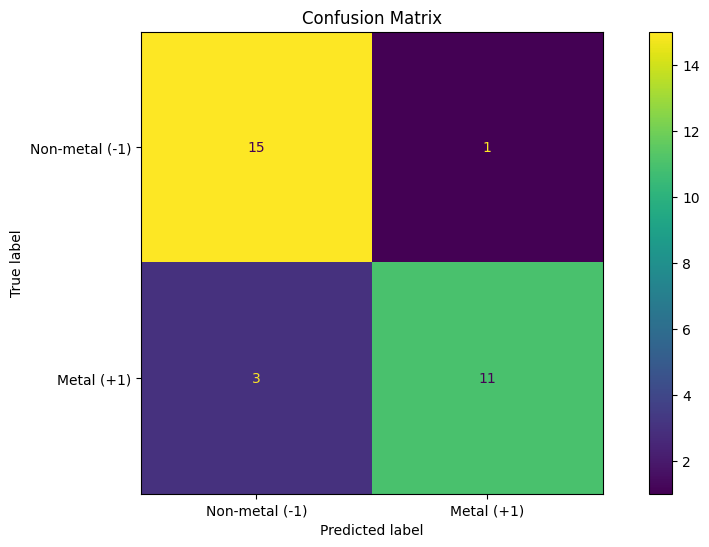

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions
pred_labels = vqc.predict(test_features)

# Create confusion matrix
cm = confusion_matrix(test_labels, pred_labels, labels=[-1, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-metal (-1)", "Metal (+1)"])

# Plot it
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels, target_names=['non-metal','metal']))

              precision    recall  f1-score   support

   non-metal       0.83      0.94      0.88        16
       metal       0.92      0.79      0.85        14

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30

